In [1]:
import numpy as np 
import squidpy as sq
import scanpy as sc
import scvelo as scv
import pandas as pd

In [2]:
adata = sc.read('data/week15.h5ad')

In [3]:
epithelial_stromal_celltypes = ['PTEN.STAT3..cells', 'NKX2.1.SOX9.CFTR..cells',
       'SCGB3A2.SFTPB.CFTR..cells', 'SCGB3A2.FOXJ1..cells',
       'SOX2lowCFTR..cells', 'Club.cells', 'SOX2highCFTR..cells', 'Budtip.progenitors',
       'Stromal.like.cells.1', 'Mature.ciliated.cells',
       'Early.AT2.like.cells', 'Proliferating.progenitors',
       'Ciliated.precursor.cells', 'PNEC', 'Stromal.like.cells.2',
       'SMG.basal.cells', 'NRGN..cells', 'SMG.secretory.cells',
       'Basal.cells','Lipofibroblasts', 'Lipofibroblast.precursors',
       'Uncommitted.cells', 'Early.fibroblasts',
       'Airway.fibroblast.progenitors', 'Airway.SMC',
       'Cycling.fibroblasts', 'Vascular.SMC', 'Chondrocyte',
       'Unknown.stromal.cells']

endothelial = ['Erythrocyte.like.EC.1',
       'KIT.CA4..endothelial.cells', 'Erythrocyte.like.EC.2',
       'Intermediate.lymphatic.EC', 'Venous.EC', 'Aerocyte', 'gCap',
       'Arterial.EC', 'Lymphatic.EC', 'Cycling.early.capillaries']

immune = [
       'Common.lymphoid.progenitor..CLP.', 'Monocyte.1',
       'Pro.inflammatory.aM1.cells', 'aM.like.cells', 'IL7R..T.cells',
       'Proliferating.macrophage_monocyte.cells',
       'Anti.inflammatory.aM2.cells', 'B.cells', 'Macrophage',
       'Monocyte_Neutrophil.precursor.cells', 'CD1C..DC', 'Monocyte.2',
       'Plasma.cell', 'Cycling.B.cells', 'Cycling.lymphoctyes',
       'Immature.DP.leukocytes', 'FLT3..preDC', 'pDC']

In [4]:
vals = adata.uns['scores'][epithelial_stromal_celltypes + endothelial]

In [5]:
corr = vals.corr()

In [6]:
new_names = ['PTEN+STAT3+ cells', 'NKX2-1+SOX9+CFTR+ cells',
       'SCGB3A2+SFTPB+CFTR+ cells', 'SCGB3A2+FOXJ1+ cells',
       'SOX2lowCFTR+ cells', 'Club cells', 'SOX2highCFTR+ cells',
       'Budtip progenitors', 'Stromal-like cells 1',
       'Mature ciliated cells', 'Tip cells',
       'Proliferating progenitors', 'Ciliated precursor cells', 'PNEC',
       'Stromal-like cells 2', 'SMG basal cells', 'NRGN+ cells',
       'SMG secretory cells', 'Basal cells', 'Lipofibroblasts',
       'Lipofibroblast precursors', 'Uncommitted cells',
       'Early fibroblasts', 'Airway fibroblast progenitors', 'Airway SMC',
       'Cycling fibroblasts', 'Vascular SMC', 'Chondrocyte',
       'Unknown stromal cells', 'Erythrocyte like EC-1',
       'KIT+CA4+ endothelial.cells', 'Erythrocyte like EC-2',
       'Intermediate lymphatic EC', 'Venous EC', 'Aerocyte', 'gCap',
       'Arterial EC', 'Lymphatic EC', 'Cycling early capillaries']
corr = pd.DataFrame(corr.values, columns=new_names, index=new_names)

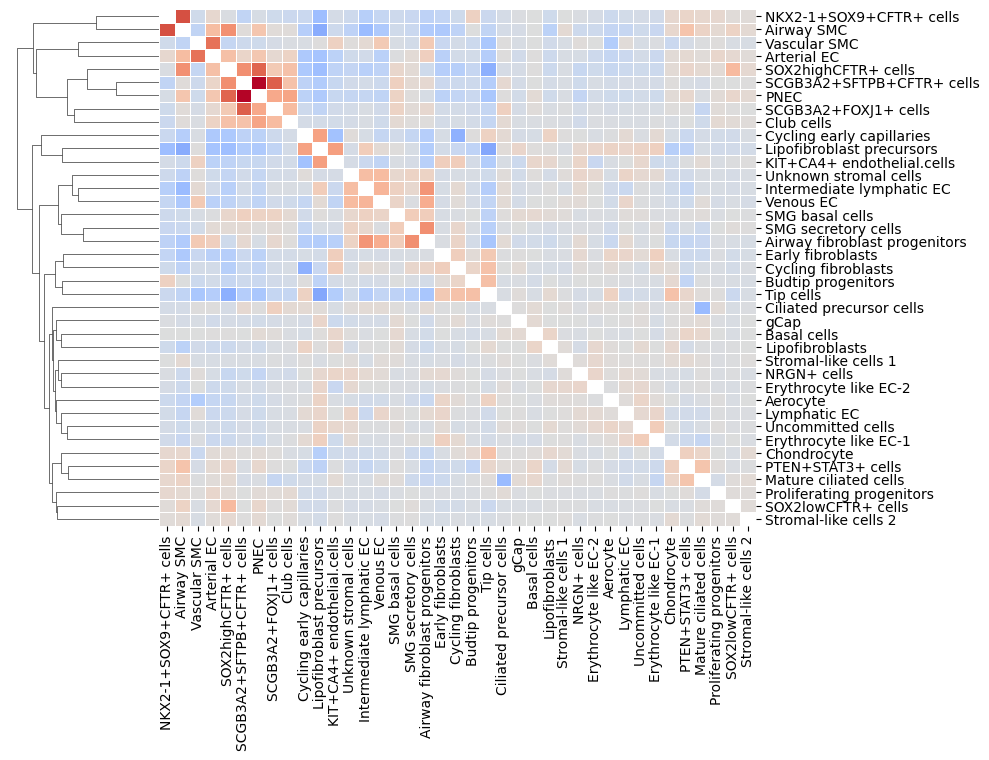

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

corr.to_csv('data/visium_correlation_GW15.csv')

cg=sns.clustermap(corr, method='weighted', yticklabels=True,
              xticklabels=True,mask=np.eye(corr.shape[0]),
              cmap='coolwarm', center=0,figsize=(10,9),linewidth=0.5)
cg.cax.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
#plt.tight_layout()
plt.savefig('Visium_correlation_GW15.pdf', bbox_inches='tight')
plt.show()